In [1]:
import pandas as pd
import numpy as np 
import os

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import NearestNeighbors

In [2]:
# Read in our Spotify songs dataset and output first five rows.
dataset = pd.read_csv(os.getcwd() + '/spotify_songs.csv')
dataset.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [3]:
print(dataset.columns)

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')


In [4]:
numeric_features = ['track_popularity',
                    'danceability', 
                    'energy', 
                    'key', 
                    'loudness', 
                    'mode', 
                    'speechiness',
                    'acousticness', 
                    'instrumentalness', 
                    'liveness', 
                    'valence', 
                    'tempo']

categorical_features = ['playlist_genre',
                        'playlist_subgenre']

In [5]:
encoder = OneHotEncoder()
# Take each categorical feature column from the dataset, transform with a OneHotEncoder, then create a Pandas DataFrame.
encoded_categorical = encoder.fit_transform(dataset[categorical_features]).toarray()
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

encoded_categorical_df.head()

,playlist_genre_edm,playlist_genre_latin,playlist_genre_pop,playlist_genre_r&b,playlist_genre_rap,playlist_genre_rock,playlist_subgenre_album rock,playlist_subgenre_big room,playlist_subgenre_classic rock,playlist_subgenre_dance pop,...,playlist_subgenre_new jack swing,playlist_subgenre_permanent wave,playlist_subgenre_pop edm,playlist_subgenre_post-teen pop,playlist_subgenre_progressive electro house,playlist_subgenre_reggaeton,playlist_subgenre_southern hip hop,playlist_subgenre_trap,playlist_subgenre_tropical,playlist_subgenre_urban contemporary
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Visualization of the one-hot encoded data to highlight the transformation of the Categorical Features

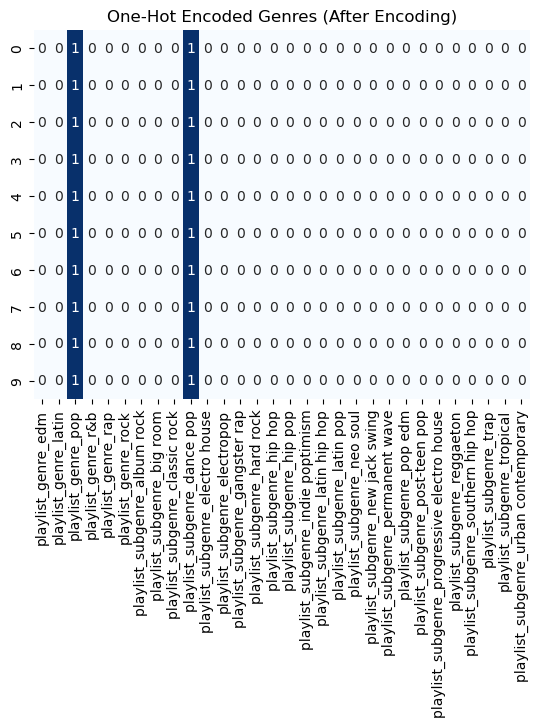

In [13]:
sns.heatmap(encoded_categorical_df.iloc[:10], annot=True, cmap="Blues", cbar=False)
plt.title("One-Hot Encoded Genres (After Encoding)")
plt.show()

In [6]:
# Visualizations of the distribution of Numerical Features before scaling

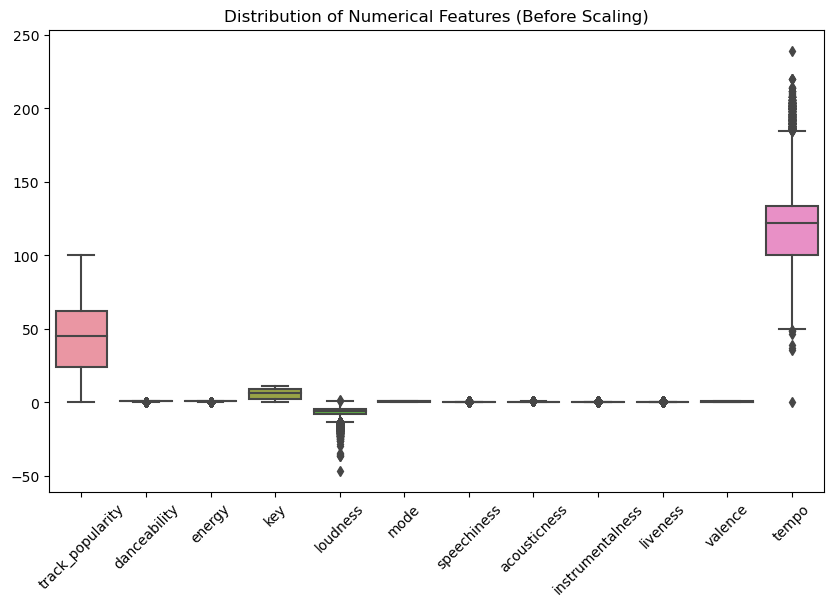

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset[numeric_features])
plt.title("Distribution of Numerical Features (Before Scaling)")
plt.xticks(rotation=45)
plt.show()

In [9]:
scaler = StandardScaler()
# Pull all numerical feature columns and scale them using StandardScaler.
scaled_numerical = scaler.fit_transform(dataset[numeric_features])
# Create Pandas DataFrame from scaled data.
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numeric_features)

scaled_numerical_df.head()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.941531,0.642049,1.201614,0.173200,1.367123,0.876177,-0.481362,-0.333898,-0.377953,-0.809230,0.031908,0.042927
1,0.981557,0.490412,0.643317,1.557627,0.585766,0.876177,-0.688642,-0.468670,-0.359177,1.081061,0.782522,-0.777198
2,1.101635,0.138889,1.284529,-1.211227,1.100090,-1.141322,-0.324422,-0.436799,-0.377849,-0.519562,0.439384,0.116227
3,0.701374,0.435271,1.279002,0.450085,0.984309,0.876177,-0.050024,-0.667642,-0.377911,0.089582,-1.001795,0.039953
4,1.061609,-0.033426,0.742815,-1.211227,0.685151,0.876177,-0.702460,-0.432701,-0.377953,-0.692585,0.919777,0.115037


In [ ]:
# Visualization of distribution of Numerical Features after scaling

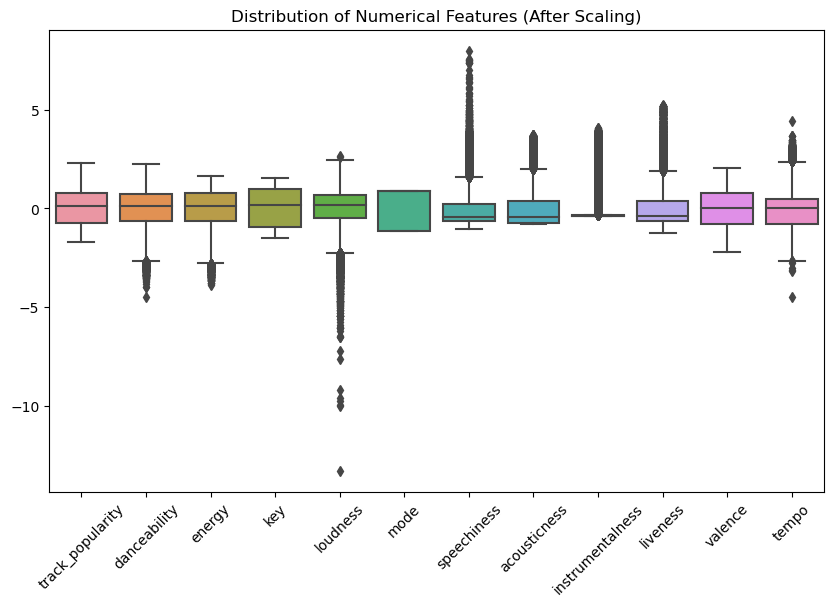

In [10]:
# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=scaled_numerical_df)
plt.title("Distribution of Numerical Features (After Scaling)")
plt.xticks(rotation=45)
plt.show()

In [15]:
# Combine each DataFrame into one single DataFrame.
processed_features_df = pd.concat([scaled_numerical_df, encoded_categorical_df], axis=1)
processed_features_df.head()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,playlist_subgenre_new jack swing,playlist_subgenre_permanent wave,playlist_subgenre_pop edm,playlist_subgenre_post-teen pop,playlist_subgenre_progressive electro house,playlist_subgenre_reggaeton,playlist_subgenre_southern hip hop,playlist_subgenre_trap,playlist_subgenre_tropical,playlist_subgenre_urban contemporary
0,0.941531,0.642049,1.201614,0.173200,1.367123,0.876177,-0.481362,-0.333898,-0.377953,-0.809230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.981557,0.490412,0.643317,1.557627,0.585766,0.876177,-0.688642,-0.468670,-0.359177,1.081061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.101635,0.138889,1.284529,-1.211227,1.100090,-1.141322,-0.324422,-0.436799,-0.377849,-0.519562,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.701374,0.435271,1.279002,0.450085,0.984309,0.876177,-0.050024,-0.667642,-0.377911,0.089582,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.061609,-0.033426,0.742815,-1.211227,0.685151,0.876177,-0.702460,-0.432701,-0.377953,-0.692585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Pull input/output (X, y) for training and testing of KNN.
X, y = processed_features_df, dataset['playlist_genre']

# Create training/testing split of data (10% of dataset goes to testing).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Create and fit KNN Classifier taking into account 15 neighbors.
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

# Predict with test data and compare to our expected output.
y_pred = knn.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9777710109622412
              precision    recall  f1-score   support

         edm       0.96      0.98      0.97       609
       latin       0.99      0.97      0.98       500
         pop       1.00      0.98      0.99       564
         r&b       0.98      0.97      0.97       533
         rap       0.97      0.98      0.97       581
        rock       0.98      0.98      0.98       497

    accuracy                           0.98      3284
   macro avg       0.98      0.98      0.98      3284
weighted avg       0.98      0.98      0.98      3284



In [17]:
# Visualization of KNN results 

In [21]:
# Example of input song for the visualization 
input_song = {
    "track_popularity": 85,
    "danceability": 0.8,
    "energy": 0.9,
    "key": 8,
    "loudness": -3.5,
    "mode": 1,
    "speechiness": 0.12,
    "acousticness": 0.1,
    "instrumentalness": 0.0,
    "liveness": 0.15,
    "valence": 0.95,
    "tempo": 146.0,
    "playlist_genre": "pop",
    "playlist_subgenre": "dance pop"
}

# Scaling of numerical features
input_song_scaled = scaler.transform(pd.DataFrame([input_song])[numeric_features])

# Encoding of categorical features
input_song_encoded = encoder.transform(pd.DataFrame([input_song])[categorical_features]).toarray()

# Concatenating features 
processed_input_song = np.concatenate([input_song_scaled, input_song_encoded], axis=1)


/Users/lamicealbaayno/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/Users/lamicealbaayno/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


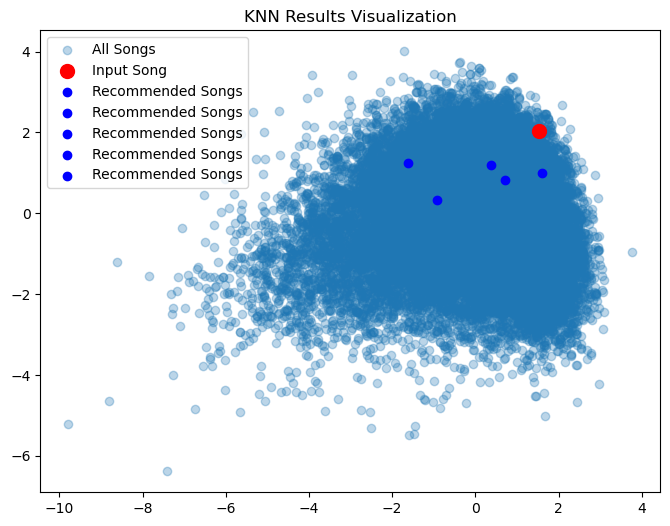

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions of the dataset
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(processed_features_df)
reduced_input = pca.transform(processed_input_song)

# Find the nearest neighbors for the input song
distances, indices = knn.kneighbors(processed_input_song, n_neighbors=5)

# Plot the songs
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], alpha=0.3, label="All Songs")
plt.scatter(reduced_input[:, 0], reduced_input[:, 1], color="red", label="Input Song", s=100)

# Highlight neighbors
for idx in indices[0]:
    plt.scatter(reduced_features[idx, 0], reduced_features[idx, 1], color="blue", label="Recommended Songs")

plt.title("KNN Results Visualization")
plt.legend()
plt.show()

In [24]:
def recommend_top_5_songs(input_song, model, feature_data, original_data, numerical_features, categorical_features, scaler, encoder, top_n=5):
    """
    Function that returns the N top songs recommended based on similarity to input song.
    
    input_song: dictionary containing teh features of the input song.
    model: the trained machine learning model
    feature_data: the dataframe containing the scaled and encoded of the processed features.
    original_data: the original dataset containing the song information.
    numerical_features: list of numerical feature names
    categorical_features: list of categorical feature names
    scaler: fitted scaler for numerical features
    encoder: fitted encoder for categorical features
    top_n: nb of recommendations to return (default is 5)
    """
    
    # convert input_song into dataframe for prediction
    input_song_df = pd.DataFrame([input_song])
    
    # features scaled and encoded like the training data
    input_song_scaled = scaler.transform(input_song_df[numerical_features])
    input_song_encoded = encoder.transform(input_song_df[categorical_features]).toarray()
    
    #combine scaled and encoded features
    processed_input_song = np.concatenate([input_song_scaled, input_song_encoded], axis=1)
    
    #predict the 5 nearest neighbors
    distances, indices = model.kneighbors(processed_input_song, n_neighbors=top_n)
    
    #get top n recommended songs
    recommended_songs = original_data.iloc[indices[0]]
    
    return recommended_songs

#example input song
input_song = {
    "track_popularity": 80,
    "danceability": 0.7,
    "energy": 0.8,
    "key": 5,
    "loudness": -5.0,
    "mode": 1,
    "speechiness": 0.05,
    "acousticness": 0.2,
    "instrumentalness": 0.0,
    "liveness": 0.1,
    "valence": 0.9,
    "tempo": 120.0,
    "playlist_genre": "pop",
    "playlist_subgenre": "dance pop"
}
top_recommended_songs = recommend_top_5_songs(
    input_song=input_song,
    model=knn,
    feature_data=processed_features_df,
    original_data=dataset,
    numerical_features=numeric_features,
    categorical_features=categorical_features,
    scaler=scaler,
    encoder=encoder,
    top_n=5
)
print(top_recommended_songs)

recommended_songs = top_recommended_songs[['track_name', 'track_artist']]
print("Recommended Songs:")
for i, row in recommended_songs.iterrows():
    print(f"{i + 1}. {row['track_name']} by {row['track_artist']}")

                     track_id                   track_name track_artist  \
6032   25CnqAR7fzAQbb2SVoSa0b            I Need A Hot Girl     Hot Boys   
18940  10bbgurV9w05vJVGAX9jYq          Yo No Soy Tu Marido    Nicky Jam   
2589   2dpaYNEQHiRxtZbfNsse99                      Happier   Marshmello   
7874   2m2dKtaKequ1QZYGWYG3hG  I'm Your Pusher / Pusherman        Ice-T   
3474   72vPueDUvJcL3MCPb55RHR           Sister Golden Hair       Spanic   

       track_popularity          track_album_id              track_album_name  \
6032                 47  6eUYT38tLl7YwqZFJm1Ulb             Guerrilla Warfare   
18940                60  3HD7DUUJXbxVd8q6Vujpri  Reggaeton Diamond Collection   
2589                 89  78EicdHZr5XBWD7llEZ1Jh                       Happier   
7874                 37  2KaB2rHtdBvocspgjm1bnN                         Power   
3474                 38  4Y4bPV6Hu7H5hgTqZ55xBE            Sister Golden Hair   

      track_album_release_date  \
6032                1999-07-

/Users/lamicealbaayno/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [25]:
def recommend_top_5_songs_multiple(input_songs, model, feature_data, original_data, numerical_features, categorical_features, scaler, encoder, top_n=5):
    """
    Function to recommend the top N songs based on similarity to the averaged attributes of multiple input songs.
    """
    
    # convert input songs into a df
    input_songs_df = pd.DataFrame(input_songs)

    # calculate average of numerical features
    averaged_numerical = input_songs_df[numerical_features].mean().to_dict()

    # take the most frequent categorical features (genre / subgenre)
    averaged_categorical = {col: input_songs_df[col].mode()[0] for col in categorical_features}

    # combine numerical and categorical features into a single input
    averaged_input_song = {**averaged_numerical, **averaged_categorical}

    # Use the existing recommend function with the averaged attributes
    recommended_songs = recommend_top_5_songs(
        input_song=averaged_input_song,
        model=model,
        feature_data=feature_data,
        original_data=original_data,
        numerical_features=numerical_features,
        categorical_features=categorical_features,
        scaler=scaler,
        encoder=encoder,
        top_n=top_n,
    )

    return recommended_songs


In [26]:
# list of songs
input_songs = [
    {
        "track_popularity": 80,
        "danceability": 0.7,
        "energy": 0.8,
        "key": 5,
        "loudness": -5.0,
        "mode": 1,
        "speechiness": 0.05,
        "acousticness": 0.2,
        "instrumentalness": 0.0,
        "liveness": 0.1,
        "valence": 0.9,
        "tempo": 120.0,
        "playlist_genre": "pop",
        "playlist_subgenre": "dance pop"
    },
    {
        "track_popularity": 60,
        "danceability": 0.6,
        "energy": 0.7,
        "key": 3,
        "loudness": -7.0,
        "mode": 0,
        "speechiness": 0.04,
        "acousticness": 0.3,
        "instrumentalness": 0.1,
        "liveness": 0.2,
        "valence": 0.8,
        "tempo": 115.0,
        "playlist_genre": "pop",
        "playlist_subgenre": "indie pop"
    }
]

# recommend songs based on the averaged attributes
recommended_songs = recommend_top_5_songs_multiple(
    input_songs=input_songs,
    model=knn,
    feature_data=processed_features_df,
    original_data=dataset,
    numerical_features=numeric_features,
    categorical_features=categorical_features,
    scaler=scaler,
    encoder=encoder,
    top_n=5
)

print("Recommended Songs:")
for i, row in recommended_songs.iterrows():
    print(f"{i + 1}. {row['track_name']} by {row['track_artist']}")


Recommended Songs:
9277. Is' mir egal by Hanybal
3067. Can't Get Over You by KVSH
8099. Clique by Kanye West
23884. Most Girls by Hailee Steinfeld
21391. Start Wit Me (feat. Gunna) by Roddy Ricch


/Users/lamicealbaayno/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [27]:
# Visualizations of the input song vs the recommended songs - Radar Chart

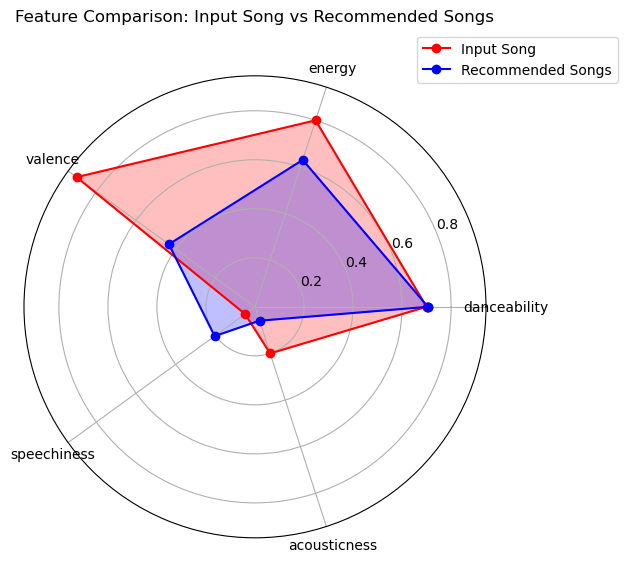

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Select features for comparison
features_to_compare = ["danceability", "energy", "valence", "speechiness", "acousticness"]

# Get the values for input song and recommended songs
input_values = [input_song[feature] for feature in features_to_compare]
recommended_values = recommended_songs[features_to_compare].mean().tolist()

# Create radar chart data
labels = np.array(features_to_compare)
input_stats = np.array(input_values)
recommended_stats = np.array(recommended_values)

# Add first value to close the radar chart
input_stats = np.concatenate([input_stats, [input_stats[0]]])
recommended_stats = np.concatenate([recommended_stats, [recommended_stats[0]]])
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)
angles = np.concatenate([angles, [angles[0]]])  # Close the circle

# Plot radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, input_stats, 'o-', label='Input Song', color='red')
ax.fill(angles, input_stats, alpha=0.25, color='red')
ax.plot(angles, recommended_stats, 'o-', label='Recommended Songs', color='blue')
ax.fill(angles, recommended_stats, alpha=0.25, color='blue')

# Set tick labels to the original features
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

ax.set_yticks([0.2, 0.4, 0.6, 0.8])
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8'])
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.title("Feature Comparison: Input Song vs Recommended Songs", y=1.1)
plt.show()